# ------------------------------------------------- Core DSP: -----------------------------------------

### Task#07: Implement some basic systems like Adder, Multiplier, Delay, Advanced, Fold etc.

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= [16,9])

In [26]:
def Adder(x1,ind1,x2,ind2):
    mn = max(ind1,ind2)
    l1 = len(x1)
    l2 = len(x2)
    mx = max(l1-ind1,l2-ind2)
    l = len(x1)
    y = []
    for i in range(-mn,mx,1):
        v1 = 0
        v2 = 0
        j = ind1 + i
        if j >= 0 and j < l1:
            v1 = x1[j]
        j = ind2+i
        if j >= 0 and j < l2:
            v2 = x2[j]
        v = v1+v2
        y.append(v)
    return y, mn

def Constant_Multiplier(mul, x):
    l = len(x)
    y = []
    for i in range(l):
        y.append( (x[i]) * mul )
    return y

def Multiplier(x1,ind1,x2,ind2):
    mn = max(ind1,ind2)
    l1 = len(x1)
    l2 = len(x2)
    mx = max(l1-ind1,l2-ind2)
    l = len(x1)
    y = []
    for i in range(-mn,mx,1):
        v1 = 0
        v2 = 0
        j = ind1 + i
        if j >= 0 and j < l1:
            v1 = x1[j]
        j = ind2+i
        if j >= 0 and j < l2:
            v2 = x2[j]
        v = v1*v2
        y.append(v)
    return y, mn
        

def Delay(d, x, ind):
    ind = ind-d
    mn = min(ind,0)
    l = len(x)
    y = []
    for i in range(mn,l,1):
        if i < 0:
            y.append(0)
        else:
            y.append(x[i])
    return y, max(ind,0)

def Advance(d, x, ind):
    ind = ind+d
    l = len(x)
    mx = max(ind,l-1)
    y = []
    for i in range(0,mx+1,1):
        if i >= l:
            y.append(0)
        else:
            y.append(x[i])
    return y, ind

def Fold(x,ind):
    return x[::-1], ind

x1 = [1,2,3,4,5,6,7,8,]
indx1 = 4
x2 = [5,6,4,7,9,2,3,4,1]
indx2 = 3
d = 2
mul = 5
a = 2

y,mn = Adder(x1,indx1,x2,indx2)
print("Adder: ",y, ";    new index: ", mn)
print("Multiplier: ",Constant_Multiplier(mul, x1), ";    new index: ",indx1)
y1,mn1 = Multiplier(x1,indx1,x2,indx2)
print("Multiplier: ",y1,";    new index: ", mn1)
y2,mn2 = Delay(3,x1,indx1)
print("Delay: ",y2,";    new index: ", mn2)
y3,mn3 = Advance(3,x1,indx1)
print("Advance: ",y3,";    new index: ", mn3)
y4,mn4 = Fold(x1,indx1)
print("Fold: ",y4,";    new index: ", mn4)  


Adder:  [1, 7, 9, 8, 12, 15, 9, 11, 4, 1] ;    new index:  4
Multiplier:  [5, 10, 15, 20, 25, 30, 35, 40] ;    new index:  4
Multiplier:  [0, 10, 18, 16, 35, 54, 14, 24, 0, 0] ;    new index:  4
Delay:  [1, 2, 3, 4, 5, 6, 7, 8] ;    new index:  1
Advance:  [1, 2, 3, 4, 5, 6, 7, 8] ;    new index:  7
Fold:  [8, 7, 6, 5, 4, 3, 2, 1] ;    new index:  4


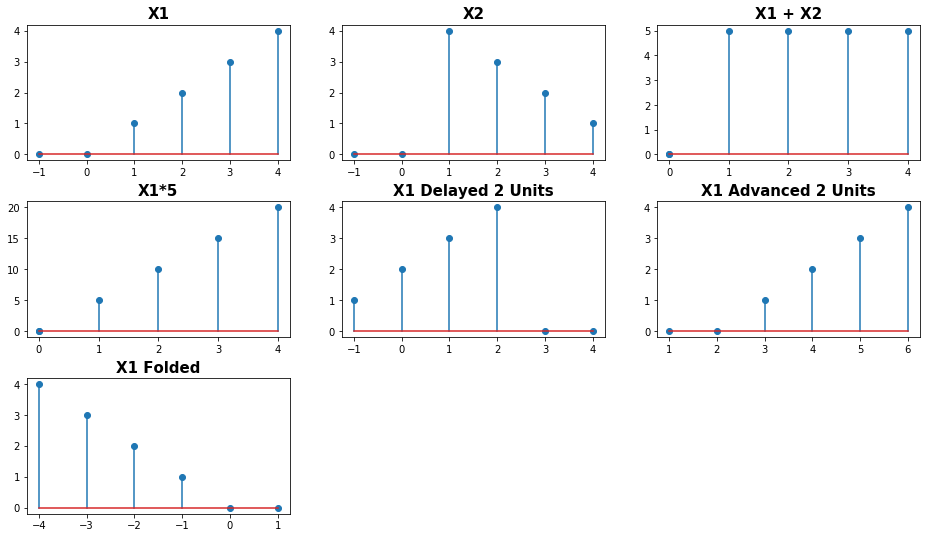

### Task#08: Implement Moving average filter, Median Filter, Accumulator etc.

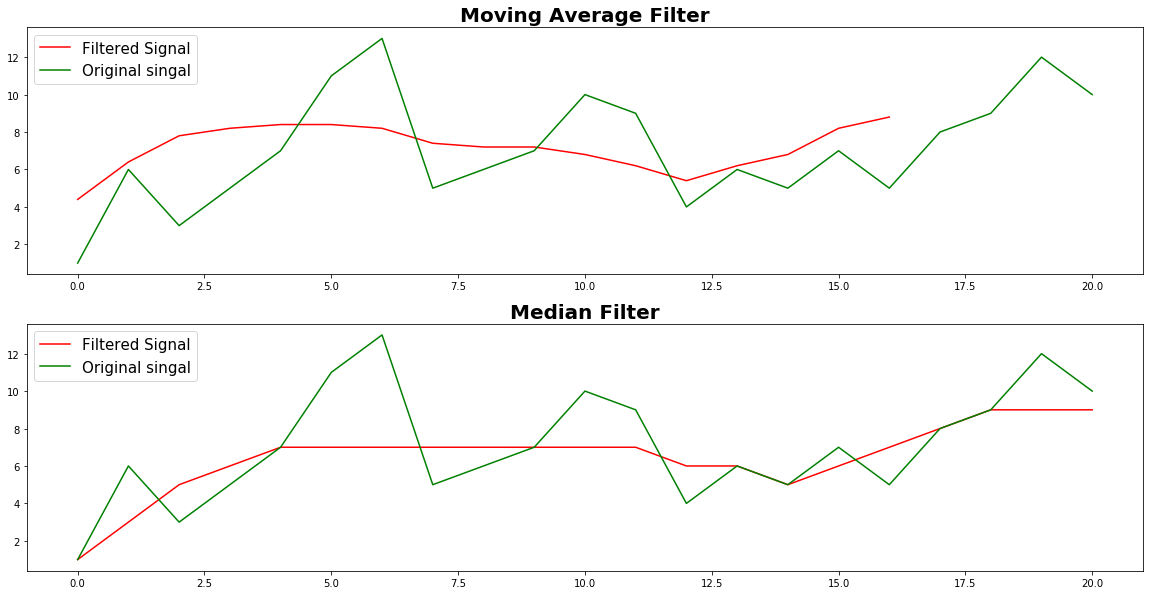

In [32]:
def movingAverage(values,window):
    weigths = np.repeat(1.0, window)/window
    m = np.convolve(values, weigths, 'valid')
    #print ("m: ",m)
    return m

signal = [1,6,3,5,7,11,13,5,6,7,10,9,4,6,5,7,5 ,8,9,12,10]
fig = plt.figure(figsize= [20,10])
plt.subplot(2,1,1)       
plt.title("Moving Average Filter", fontweight="bold", fontsize= 20)
plt.plot(movingAverage(signal,5), 'r-', label="Filtered Signal")
plt.plot(signal, 'g', label='Original singal')
plt.legend(prop={'size': 15})
#plt.show()

def medianFilter(data):
    return medfilt(data, kernel_size=5)

plt.subplot(2,1,2)       
plt.title("Median Filter", fontweight="bold", fontsize= 20)
plt.plot(medianFilter(signal), 'r-', label="Filtered Signal")
plt.plot(signal, 'g', label='Original singal')
plt.legend(prop={'size': 15})
plt.show()



### Task#09: Convolution

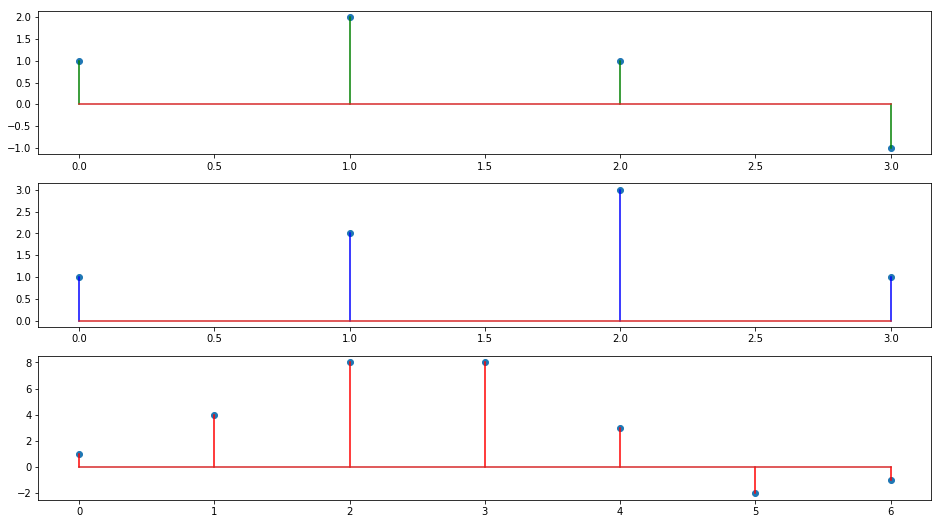

In [41]:
import scipy.signal
fig = plt.figure(figsize= [16,9])

h=[1,2,1,-1]
x=[1,2,3,1]

X=scipy.signal.convolve(hn,xn, 'full')
plt.subplot(3,1,3) 
plt.stem(X,'r-')
plt.subplot(3,1,2) 
plt.stem(x,'b-')
plt.subplot(3,1,1) 
plt.stem(h,'g-')
plt.show()

### Task#10: program to find the DFT/IDFT

/Users/shakkhor/anaconda3/envs/NLP/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


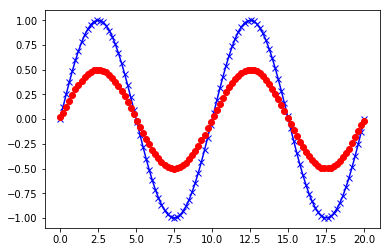

In [42]:
import numpy.fft as DFT ### Getting DFT using fft
N = 100
f=1/10
t = np.linspace(0,20,N)
x = np.sin(2*np.pi*f*t)

y = DFT.fftn(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = DFT.ifftn(y*window, norm='ortho')

plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
plt.show()

### Tasks#11: DFT/IDFT -> Composite Sinusoidal Signal to see the frequencies

/Users/shakkhor/anaconda3/envs/NLP/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


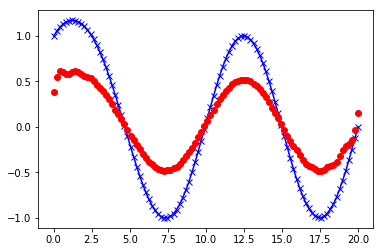

In [43]:
import numpy.fft as DFT ### Getting DFT using fft
N = 100
f=1/10
t = np.linspace(0,20,N)
x = np.sin(2*np.pi*f*t) + np.exp(-t/3)*np.cos(2*np.pi*f*t) ##Composite signal

y = DFT.fftn(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = DFT.ifftn(y*window, norm='ortho')

plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
plt.show()

### Task#12: Read a .wav, img file and plot them, play / open them. Then apply DFT.

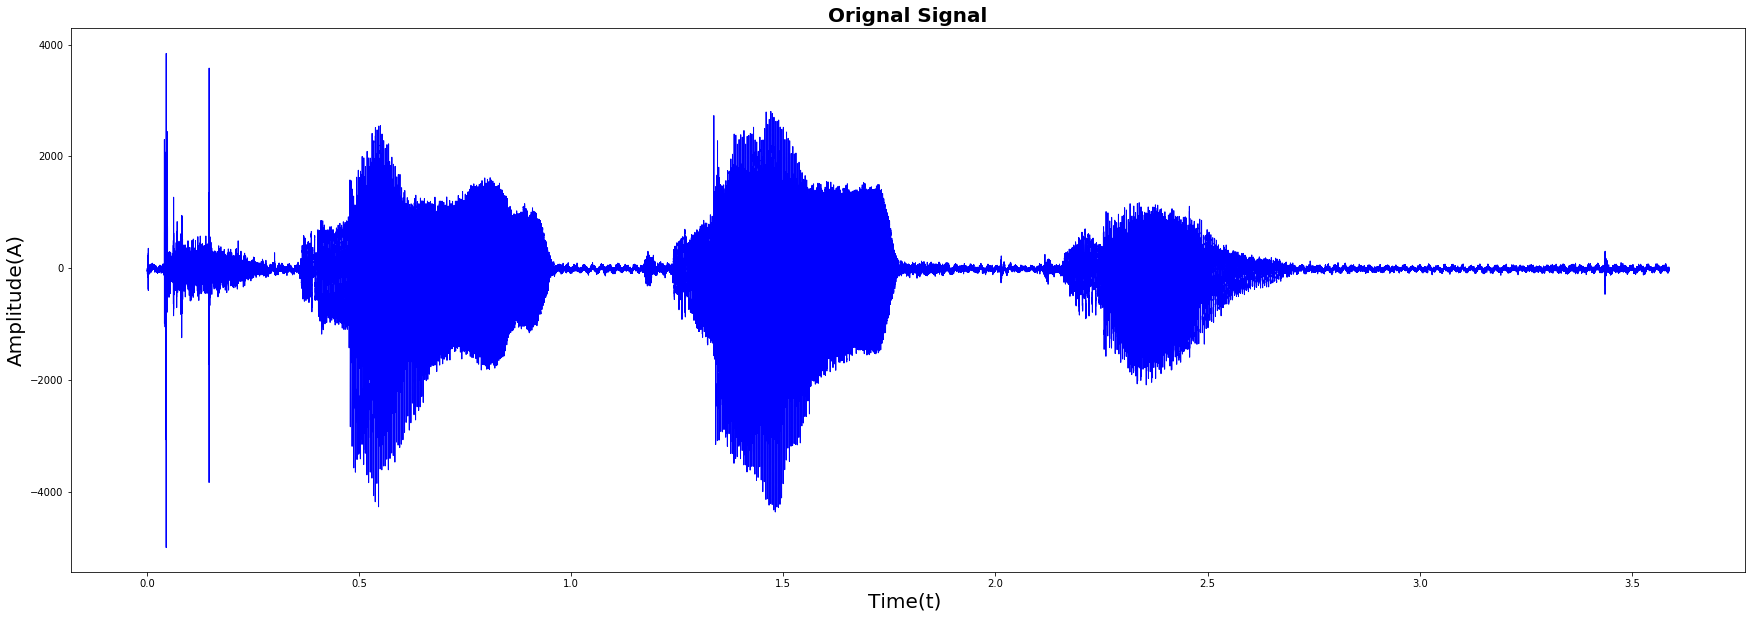

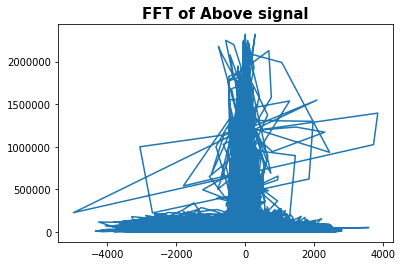

In [28]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np


#### READ WAV FILE === 
sample_rate, data = wav.read('test.wav')

times = np.arange (len(data))/(float(sample_rate)) ## getting time of each sample ...

plt.figure(figsize=(30, 10))

plt.fill_between(times, data, color='b')
plt.xlabel('Time(t) ', fontsize = 20)
plt.ylabel('Amplitude(A)', fontsize = 20)
plt.title("Orignal Signal", fontweight="bold", fontsize= 20)

plt.show()

plt.savefig('plot.png', dpi=100)

fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.title("FFT of Above signal", fontweight="bold", fontsize= 15)
plt.show()

/home/hasanmdmehadi/anaconda3/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


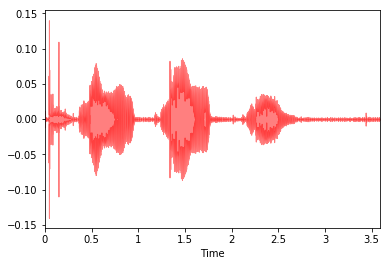

In [30]:
import numpy, scipy, sklearn, librosa, urllib, IPython.display
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (14,4)
import librosa.display
x, fs = librosa.load('test.wav', duration=10)
librosa.display.waveplot(x, sr=fs, color='r', alpha=0.5)
IPython.display.Audio(x, rate=fs)

### image plot

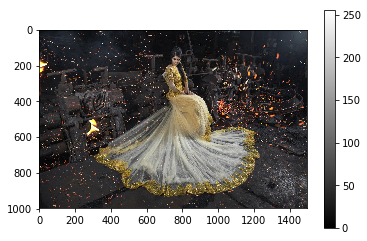

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('test.jpeg')
imgplot = plt.imshow(img)
plt.colorbar()

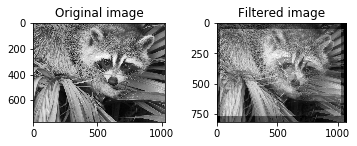

In [37]:
from scipy import signal, misc
import numpy as np
image = misc.face(gray=True).astype(np.float32)
plt.subplot(2,2,1)
plt.imshow(image)
plt.gray()
plt.title('Original image')

##DFT (Filtering)
w = np.zeros((50, 50))
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(image, w)
plt.subplot(2,2,2)
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

### Task#13:  Linear Convolution

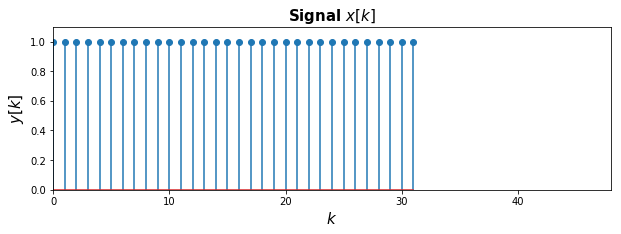

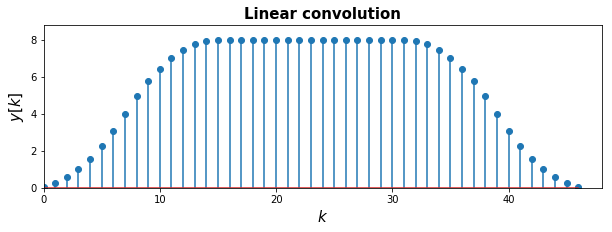

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

L = 32  # length of signal x[k]
N = 16  # length of signal h[k]
M = 16  # periodicity of periodic convolution


def cconv(x, h, M):
    L = len(x)
    N = len(h)
    # periodic continuation of x
    xc = np.copy(x)
    if M<L:
        xc[0:-M+L] += xc[M:L]
        xc = xc[0:M]
    # zero-padding of h
    hp = h
    if N<M:
        hp = np.append(hp, np.zeros(M-N))
    # circular convolution
    y = [np.dot(np.roll(xc[::-1], k+1), hp) for k in np.arange(M)]

    return np.asarray(y)

# generate signals
x = np.ones(L)
h = sig.triang(N)

# linear convolution
y1 = np.convolve(x, h, 'full')

# plot results
def plot_signal(x):
    plt.figure(figsize = (10, 3))
    plt.stem(x)
    plt.xlabel(r'$k$', fontsize= 15)
    plt.ylabel(r'$y[k]$', fontsize= 15)
    plt.axis([0, N+L, 0, 1.1*x.max()])

plot_signal(x)
plt.title('Signal $x[k]$', fontweight="bold", fontsize= 15)

plot_signal(y1)
plt.title('Linear convolution', fontweight="bold", fontsize= 15)
plt.show()

### Task#14: Circular Convolution Program

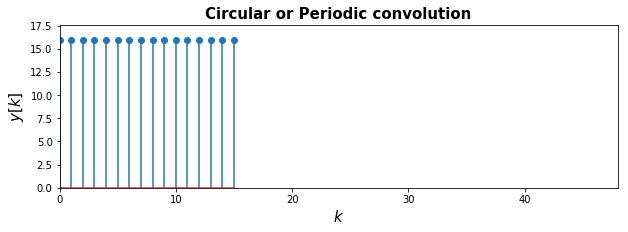

In [43]:
# periodic convolution
y2 = cconv(x, h, M)

plot_signal(y2)
plt.title('Circular or Periodic convolution', fontweight="bold", fontsize= 15)
plt.show()

### Task#15: Linear Convolution by FFT, IFFT [DFT, IDFT]

/home/hasanmdmehadi/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


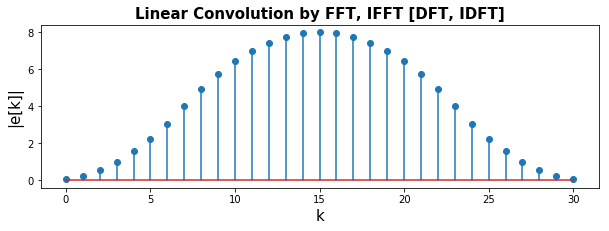

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

L = 16  # length of signal x[k]
N = 16  # length of signal h[k]
M = N+L-1

# generate signals
x = np.ones(L)
h = sig.triang(N)

# fast convolution
y2 = np.fft.ifft(np.fft.fft(x, M)*np.fft.fft(h, M))

plt.figure(figsize=(10, 3))
plt.stem(y2)
plt.xlabel(r'k', fontsize= 15)
plt.ylabel(r'|e[k]|',fontsize= 15)

plt.title('Linear Convolution by FFT, IFFT [DFT, IDFT]', fontweight="bold", fontsize= 15)
plt.show()

### Task#16: Circular Convolution by FFT, IFFT [DFT, IDFT]

/home/hasanmdmehadi/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


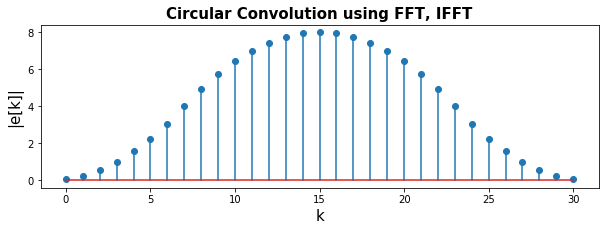

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

L = 16  # length of signal x[k]
N = 16  # length of signal h[k]
M = N+L-1

# generate signals
x = np.ones(L)
h = sig.triang(N)

def circular_conv():
    return np.fft.ifft(np.fft.fft(x, M)*np.fft.fft(h, M))

y = circular_conv()

plt.figure(figsize=(10, 3))
plt.title("Circular Convolution using FFT, IFFT", fontweight="bold", fontsize= 15)
plt.stem(y)
plt.xlabel(r'k', fontsize = 15)
plt.ylabel(r'|e[k]|', fontsize = 15)
plt.show()